# WeatherPy

### <font color=red>IMPORTANT: You must update api_keys.py with your key for the book to run properly.</font>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
#Create dataframe
weather_df = pd.DataFrame(columns=["Id", "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

In [5]:
#Get the date for our chart. Putting in same cell as API call, so we know it matches the date when the data was requested
pretty_date = time.strftime("%x", time.localtime())

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

#set starting row for dataframe
row=0

for city in cities:
        try:
            query_url = base_url + city

            # Get current weather
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            #Set variables from result.
            city_id = weather_json["id"]
            city_name = weather_json["name"]
            country = weather_json["sys"]["country"]            
            cloudiness = weather_json["clouds"]["all"]
            humidity = weather_json["main"]["humidity"]
            current_time = weather_json["dt"]
            lat = weather_json["coord"]["lat"]
            lon = weather_json["coord"]["lon"]
            max_temp = weather_json["main"]["temp_max"]
            wind_speed = weather_json["wind"]["speed"]

            #add rows to dataframe
            weather_df.loc[row] = [city_id, city_name, country, lat, lon, max_temp, cloudiness, current_time, humidity, wind_speed]

            print(f'The current summary for {city} is: \n      cloudiness: {cloudiness}, temp:{max_temp}\n')

            row+=1
        
        #Checking to make sure the City exists
        except(KeyError):
            print(f"{city} not found. Skipping...\n")

The current summary for vanderhoof is: 
      cloudiness: 33, temp:67.59

The current summary for pevek is: 
      cloudiness: 0, temp:36.81

The current summary for qaanaaq is: 
      cloudiness: 0, temp:41.13

The current summary for saint-philippe is: 
      cloudiness: 90, temp:80.6

The current summary for cape town is: 
      cloudiness: 0, temp:60.8

The current summary for jardim is: 
      cloudiness: 3, temp:85.77

The current summary for coihaique is: 
      cloudiness: 40, temp:53.6

palasa not found. Skipping...

The current summary for pangnirtung is: 
      cloudiness: 75, temp:50

The current summary for vaini is: 
      cloudiness: 43, temp:75.87

kismayo not found. Skipping...

The current summary for ushuaia is: 
      cloudiness: 75, temp:39.2

The current summary for mataura is: 
      cloudiness: 100, temp:42.01

The current summary for avarua is: 
      cloudiness: 22, temp:75.2

The current summary for erenhot is: 
      cloudiness: 0, temp:60.75

The current su

The current summary for new norfolk is: 
      cloudiness: 75, temp:45

The current summary for kavaratti is: 
      cloudiness: 100, temp:81.81

The current summary for chokurdakh is: 
      cloudiness: 0, temp:52.47

The current summary for leningradskiy is: 
      cloudiness: 9, temp:37.53

The current summary for mirnyy is: 
      cloudiness: 100, temp:57.69

sentyabrskiy not found. Skipping...

The current summary for kapaa is: 
      cloudiness: 90, temp:84.2

The current summary for tuy hoa is: 
      cloudiness: 92, temp:76.05

The current summary for nabire is: 
      cloudiness: 95, temp:69.93

The current summary for hobart is: 
      cloudiness: 75, temp:45

The current summary for bluff is: 
      cloudiness: 0, temp:55.71

The current summary for saskylakh is: 
      cloudiness: 0, temp:48.51

The current summary for zhangzhou is: 
      cloudiness: 95, temp:82.4

The current summary for nantucket is: 
      cloudiness: 75, temp:75

The current summary for hofn is: 
     

The current summary for sonqor is: 
      cloudiness: 40, temp:84.2

The current summary for bonthe is: 
      cloudiness: 100, temp:76.41

The current summary for karratha is: 
      cloudiness: 0, temp:57.69

The current summary for bassila is: 
      cloudiness: 100, temp:72.09

The current summary for el tigre is: 
      cloudiness: 100, temp:81.63

The current summary for charlestown is: 
      cloudiness: 90, temp:84.99

The current summary for inhambane is: 
      cloudiness: 0, temp:58.77

The current summary for rio cuarto is: 
      cloudiness: 0, temp:66.2

The current summary for tanete is: 
      cloudiness: 97, temp:78.39

The current summary for namibe is: 
      cloudiness: 100, temp:65.97

The current summary for sicamous is: 
      cloudiness: 75, temp:78.01

The current summary for urbano santos is: 
      cloudiness: 93, temp:82.17

bacuit not found. Skipping...

The current summary for balkanabat is: 
      cloudiness: 0, temp:83.07

The current summary for torbay 

The current summary for tugulym is: 
      cloudiness: 0, temp:66.99

The current summary for yinchuan is: 
      cloudiness: 0, temp:66

tsihombe not found. Skipping...

The current summary for price is: 
      cloudiness: 1, temp:91.4

ruatoria not found. Skipping...

The current summary for santo tomas is: 
      cloudiness: 75, temp:78.8

The current summary for seymchan is: 
      cloudiness: 0, temp:58.77

The current summary for okhotsk is: 
      cloudiness: 0, temp:59.67

The current summary for rey bouba is: 
      cloudiness: 100, temp:72.63

temaraia not found. Skipping...

The current summary for port blair is: 
      cloudiness: 100, temp:82.89

The current summary for joensuu is: 
      cloudiness: 0, temp:54

The current summary for dilla is: 
      cloudiness: 85, temp:74.97

The current summary for shimoda is: 
      cloudiness: 19, temp:81

The current summary for port macquarie is: 
      cloudiness: 71, temp:50

The current summary for anadyr is: 
      cloudiness:

tumannyy not found. Skipping...

umzimvubu not found. Skipping...

The current summary for grand gaube is: 
      cloudiness: 40, temp:71.01

The current summary for thunder bay is: 
      cloudiness: 75, temp:73.4

The current summary for kalmar is: 
      cloudiness: 8, temp:64

The current summary for beruwala is: 
      cloudiness: 98, temp:81.81

The current summary for kurumkan is: 
      cloudiness: 0, temp:42.57

The current summary for hargeysa is: 
      cloudiness: 50, temp:73.89

The current summary for tarrafal is: 
      cloudiness: 75, temp:80.6

The current summary for saquena is: 
      cloudiness: 72, temp:87.21

The current summary for srandakan is: 
      cloudiness: 100, temp:74.61

ipora not found. Skipping...

The current summary for san buenaventura is: 
      cloudiness: 0, temp:95.49

The current summary for sydney mines is: 
      cloudiness: 75, temp:75

waling not found. Skipping...

The current summary for dwarka is: 
      cloudiness: 75, temp:82.4

The c

In [29]:
weather_df.head()

,Id,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,6173361,Vanderhoof,33,CA,1565987587,39,54.02,-124.02,67.59,0.69
1,2122090,Pevek,0,RU,1565987587,85,69.70,170.27,36.81,1.77
2,3831208,Qaanaaq,0,GL,1565987588,44,77.48,-69.36,41.13,1.68
3,6138908,Saint-Philippe,90,CA,1565987588,57,45.36,-73.48,80.60,6.93
4,3369157,Cape Town,0,ZA,1565987588,67,-33.93,18.42,60.80,23.04


In [36]:
#for 11-web homework
weather_df.head()
weather_df_for_html = weather_df[['City','Country','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]

In [39]:
weather_df_for_html.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanderhoof,CA,54.02,-124.02,67.59,39,33,0.69
1,Pevek,RU,69.70,170.27,36.81,85,0,1.77
2,Qaanaaq,GL,77.48,-69.36,41.13,44,0,1.68
3,Saint-Philippe,CA,45.36,-73.48,80.60,57,90,6.93
4,Cape Town,ZA,-33.93,18.42,60.80,67,0,23.04


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv("city_weather_data.csv")

In [40]:
weather_df_for_html.to_html("city_weather_data.html")

In [8]:
weather_df.head(10)

,Id,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,6173361,Vanderhoof,33,CA,1565987587,39,54.02,-124.02,67.59,0.69
1,2122090,Pevek,0,RU,1565987587,85,69.70,170.27,36.81,1.77
2,3831208,Qaanaaq,0,GL,1565987588,44,77.48,-69.36,41.13,1.68
3,6138908,Saint-Philippe,90,CA,1565987588,57,45.36,-73.48,80.60,6.93
4,3369157,Cape Town,0,ZA,1565987588,67,-33.93,18.42,60.80,23.04
5,3460087,Jardim,3,BR,1565987421,31,-21.48,-56.15,85.77,4.32
6,3894426,Coihaique,40,CL,1565987589,50,-45.58,-72.07,53.60,4.70
7,6096551,Pangnirtung,75,CA,1565987589,81,66.15,-65.72,50.00,8.05
8,1273574,Vaini,43,IN,1565987589,90,15.34,74.49,75.87,1.12
9,3833367,Ushuaia,75,AR,1565987590,69,-54.81,-68.31,39.20,28.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

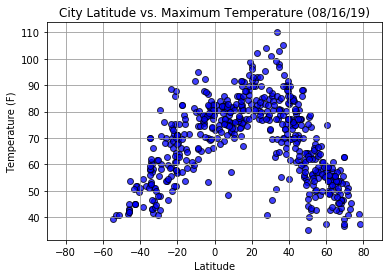

In [57]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Maximum Temperature ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.figsize=(8, 8)

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Max Temp'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

# Save Figure
plt.savefig("lat_vs_max_temp.png", dpi=100)

#show
plt.show()

#### Latitude vs. Humidity Plot

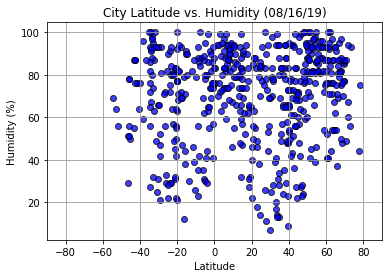

In [58]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.figsize=(8, 8)

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Humidity'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

# Save Figure
plt.savefig("lat_vs_humidity.png", dpi=100)

#show
plt.show()

#### Latitude vs. Cloudiness Plot

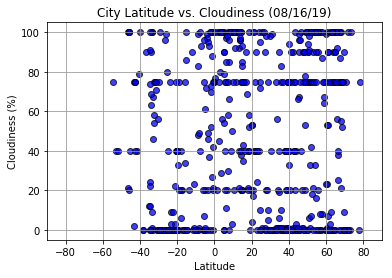

In [59]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.figsize=(8, 8)

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Cloudiness'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

# Save Figure
plt.savefig("lat_vs_cloudiness.png", dpi=100)

#show
plt.show()

#### Latitude vs. Wind Speed Plot

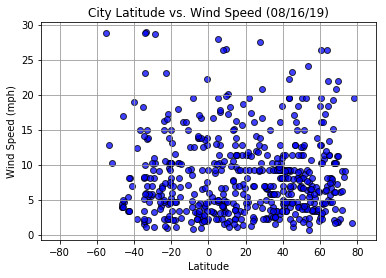

In [60]:
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({pretty_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.figsize=(8, 8)

#create graph
plt.scatter(x=weather_df['Lat'], y=weather_df['Wind Speed'], alpha=0.75, c='blue', edgecolors='black', label="Urban")

# Save Figure
plt.savefig("lat_vs_wind_speed.png", dpi=100)


#show
plt.show()

## Trends

- Temperature is correlated with distance from the equator.
- Temperature are currently highest between the 20th and 40th latitiude.
- Cloudiness and Humidity do not appear to correlate with the Latitude.
- High wind speeds(above 15 mph) are less common overall but also as you get further away from the equator.
- On 7/14 humidity above 50% was most common.